
### CAN'T SEE THE FOREST, FOR ALL THE TREES

**Laboration**

Syftet med den här laborationen är att lära oss hur vi på ett korrekt sätt kan tune:a hyperparameters samt träna och jämföra prestanda mellan många olika modeller - för ett verklighetstroget problem.

Vi kommer framförallt jobba med trädbaserade modeller - Decision Tree och Random Forest.

Datasetet som vi kommer jobba med och information om denne hittar ni [här](https://archive.ics.uci.edu/dataset/320/student+performance). Ni ska jobba med filen som heter 'student-por.csv'.

**Instruktioner**

Utför varje uppgift så att jag kan köra er notebook rakt-av, uppifrån och ner! Varje uppgift ska lösas på angiven plats.

**Inlämning**

Skicka in hela din notebook på ITHS-portalen, efter att du döpt om den till *laboration_forest_förnamn_efternamn.ipynb*.

**Uppgift 0**

In [32]:
# importera samtliga nödvändiga paket här.
# efterhand kanske du inser att du behöver importera fler paket, lägg då över importerna hit istället
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split  
from sklearn.metrics import make_scorer, mean_absolute_error

**Uppgift 1**

Läs på om datasetet. Ladda därefter ner den och läs in den till en pandas dataframe. 

Obs: du bör troligtvis behöva *delimiter=';'* som argument till pd.read_csv funktionen.

In [18]:
# lös uppgift 1 här
student_df = pd.read_csv("../data/student-por.csv", delimiter=";")
student_df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**Uppgift 2**

Utför en ordentlig EDA (Exploratory Data Analysis). Rita upp relevanta plottar och kommentera på det du känner är befogat.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


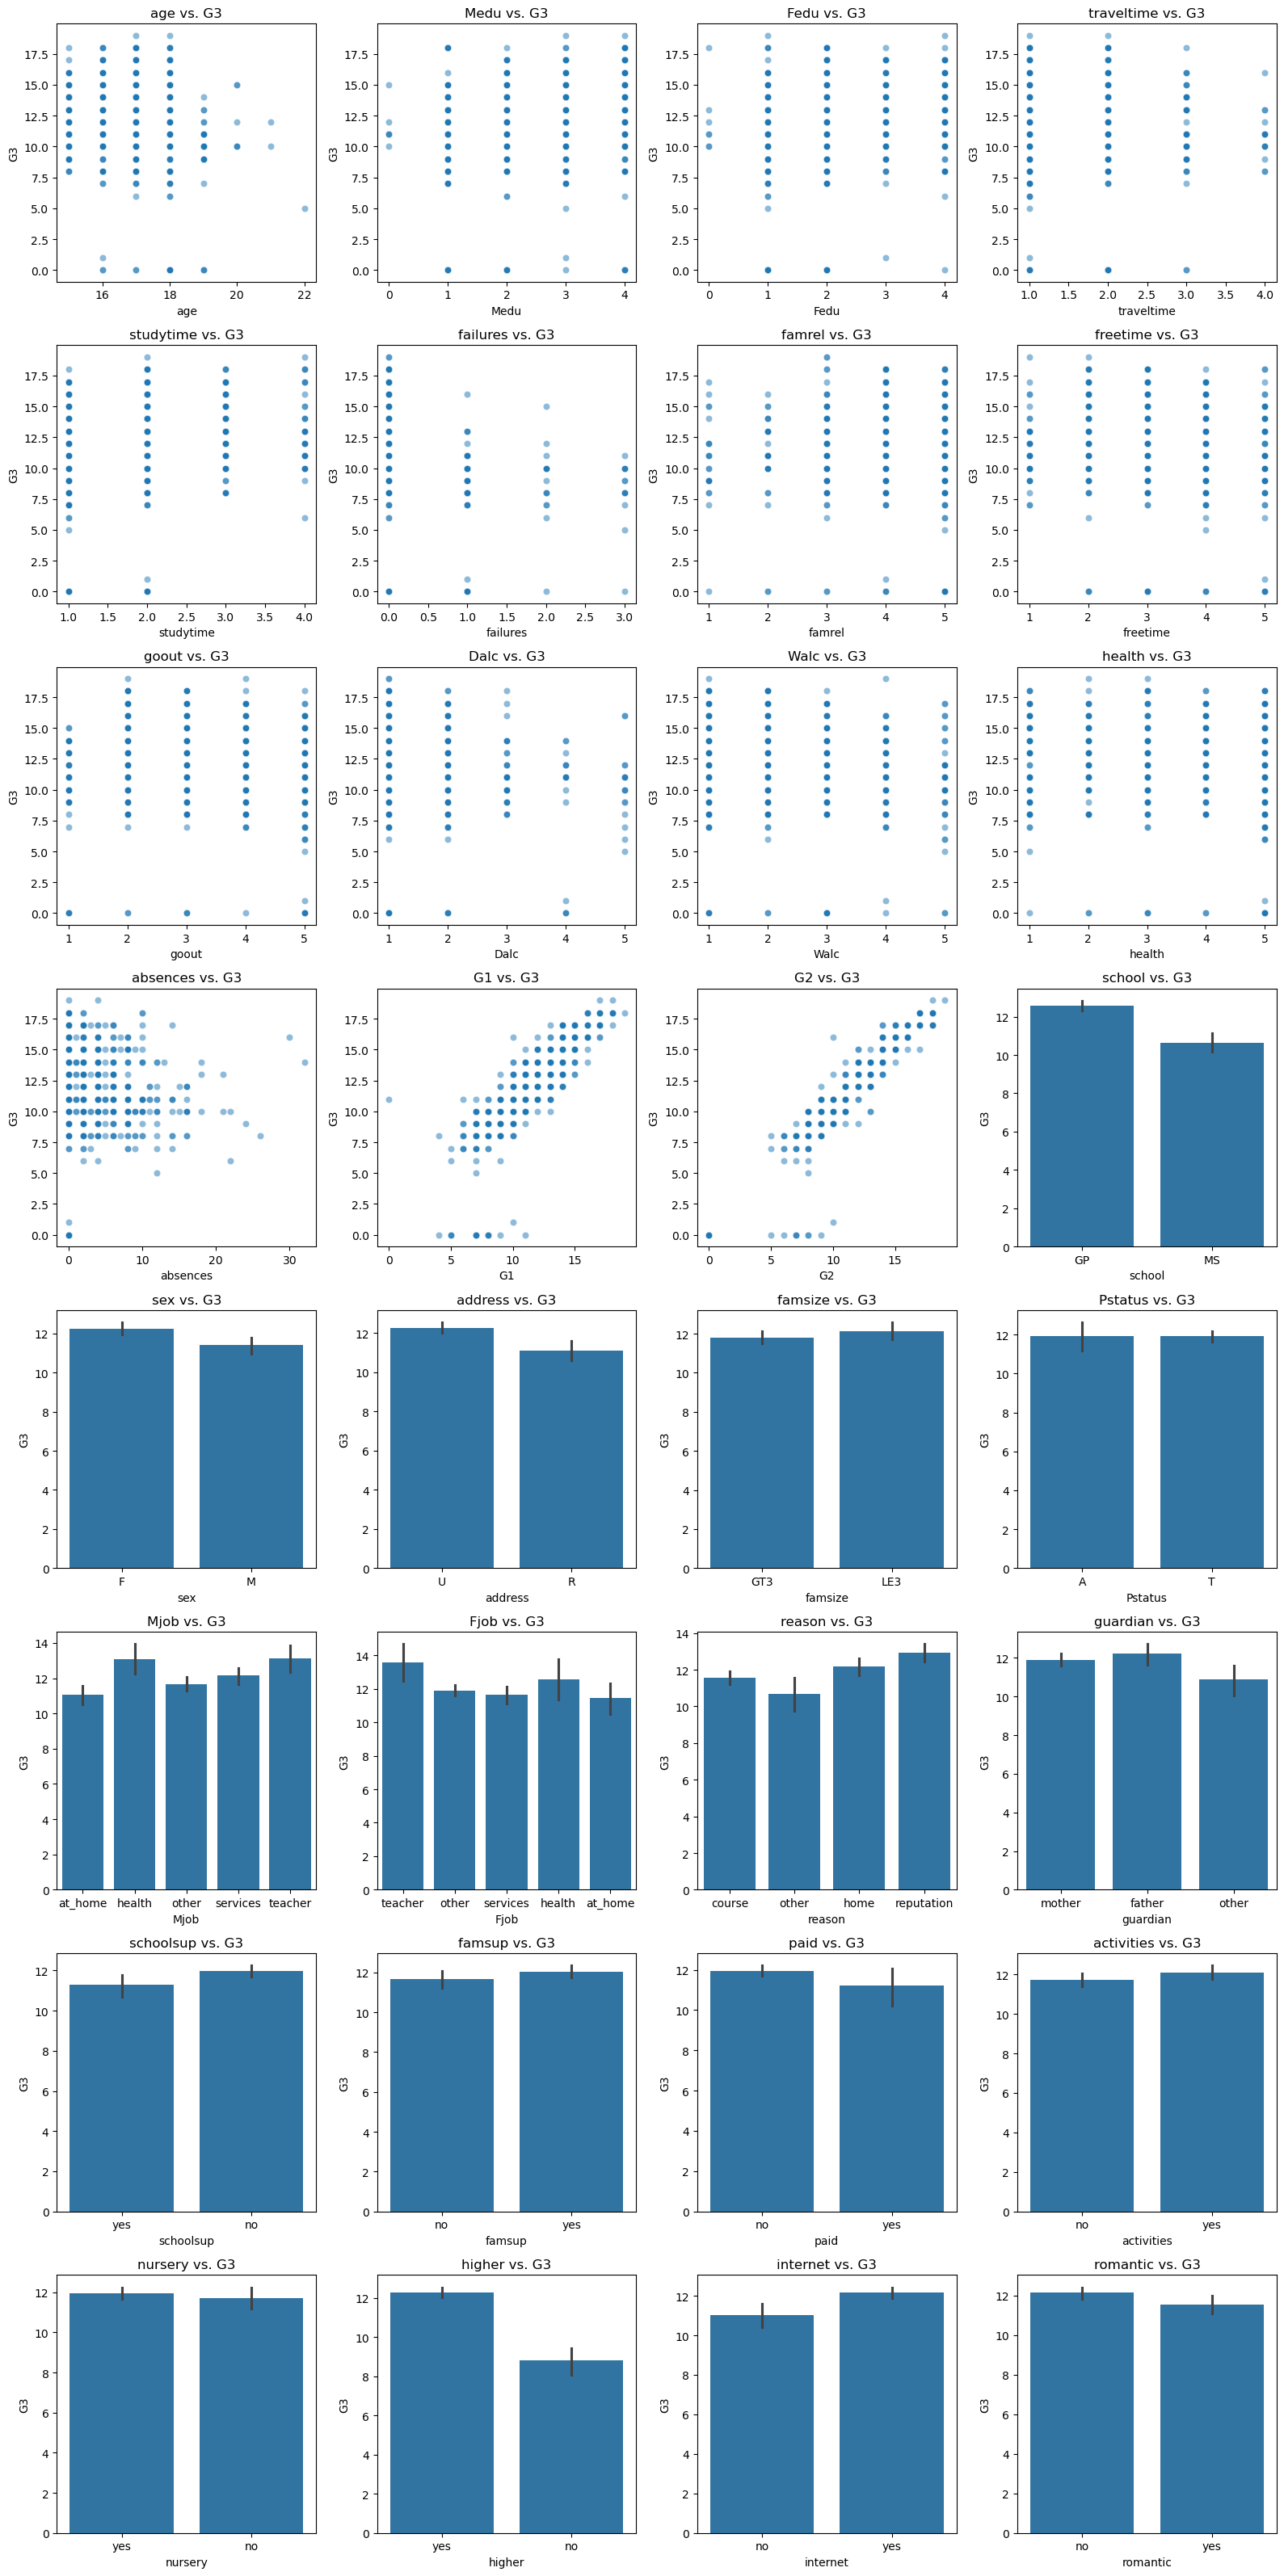

In [36]:
# lös uppgift 2 här
student_df.info()
""" profile = ProfileReport(student_df, title="Pandas Profile Report", explorative=True, html= {'style':{'full_width': True}})
profile.to_file("output.html") 
profile.to_notebook_iframe() """
print(student_df.isnull().sum())
display(student_df.describe())

numeric_columns = student_df.select_dtypes(include=["int64"]).columns.drop("G3")
categorical_columns = student_df.select_dtypes(include=["object"]).columns

all_columns = list(numeric_columns) + list(categorical_columns)  
num_vars = len(all_columns)

ncols = 4  
nrows = math.ceil(num_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=student_df[col], y=student_df["G3"], ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{col} vs. G3")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("G3")

for j, col in enumerate(categorical_columns, start=len(numeric_columns)):
    sns.barplot(x=student_df[col], y=student_df["G3"], ax=axes[j])
    axes[j].set_title(f"{col} vs. G3")
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("G3")

plt.tight_layout()
plt.show()




**Uppgift 3**

Gör en första hypotes på vilka features du tror är relevanta. 

Tvätta sedan datan och utför även den feature engineering du anser är lämplig. 

Kom ihåg att du även behöver hantera kategoriska kolumner. 

Motivera samtliga beslut och åtgärder med kommentarer.

In [ ]:
# lös uppgift 3 här

**Uppgift 4**

Särkilj nu på features och target. Vår target är kolumnen G3.

Lägg alla features i variabeln X och din target i variabel y.

Obs! Du får inte använda kolumnerna G1 eller G2 som features, det är nästintill fuskig (varför?). Säkerställ att de **inte** är med i dina features.

Spara även namnen på kolumnerna du använder som features i en variabel som du kallar feature_column_names

In [ ]:
# lös uppgift 4 här

**Uppgift 5**

Utför en helt vanlig train/test split. Sätt test size till 20%. Träna sedan en RandomForestRegressor på din träningsdata.

Använd random_state = 42 i både train/test split samt som argument till din modell.

In [ ]:
# lös uppgift 5 här


model = 
model.fit()

Kör nu koden nedan för att hur relativt viktig varje kolumn var för vår träning! Ett högre värde = viktigare kolumn.

Hur tolkar du det du ser? Does it make sense?

In [ ]:
plt.bar(feature_column_names, model.feature_importances_);
plt.xticks(rotation=45);
plt.show()

**Uppgift 6**

Bra. Nu drar vi igång på riktigt.

Kör nu koden nedan för att utföra en GridSearch (med cross-validation) över alla kombinationer av de angivna hyperparameters.

Observera att vi använder hela datasetet X och y här, inte dina splits ovan. GridSearchCV skapar automatiskt splits åt oss.

Dokumentationen för GridSearchCV hittar du [här](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Skapa en parametergrid att söka bland

param_grid = {
    'max_depth': [2, 4, 6],
    'n_estimators': [2, 4, 6, 8, 10]
}

# Initiera en basmodell
rf = RandomForestRegressor()

# Defiiniera metric att räkna performance
score = make_scorer(mean_absolute_error)

# Definiera GridSearch-objektet
grid_search = GridSearchCV(estimator = rf,                # ange basmodell
                           param_grid = param_grid, 
                           cv = 3,                        # 3-fold cross-validation
                           n_jobs = -1,                   # använd alla möjliga processer för snabbare träning
                           verbose = 2,                   # läs i dokumentationen vad detta innebär
                           scoring=score) 

# Utför grid search över alla möjliga kombinationer av dina hyperparameters
grid_search.fit(X, y)

**Uppgift 7**

Kör koden nedan för att utforska vilken information som nu sparats från din GridSearch

In [ ]:
cv_results = grid_search.cv_results_

cv_results.keys()

**Uppgift 8**

Vilken kombination av hyperparameters gav upphov till bäst/sämst performance?

Vilken är den bästa/sämsta scoren?

In [ ]:
# lös uppgift 8 här

**Uppgift 9**

Är den bästa scoren "bra" i vårt sammanhang? Varför? Motivera.

*tips:* utför en ordentlig error analysis.

In [ ]:
# lös uppgift 9 här

**Uppgift 10**

Testa nu att träna med dina egenvalda hyperparameters! 

Du kan lägga till fler värden för max_depth och n_estimators, men du kan också välja fler hyperparameters att tune:a.

Random Forest har många fler hyperparameters, kolla in den officiella dokumentationen [här](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Lägg till minst 4 fler hyperparameters, utöver max_depth och n_estimators, och välj vilka värden på dessa du vill testa. 

Kör igenom en till GridSearch över dessa. Får du bättre resultat än innan?

**Tips**: För din egen skull, försök även första vad de olika hyperparameters du väljer faktiskt kontrollerar.

In [ ]:
# lös uppgift 10 här

**Uppgift 11**

Kör nu även en GridSearch på en enstaka Decision Tree (inte Random Forest) där du testar olika värden på max_depth.

Hur förhåller sig resultatet här mot det vi fick med Random Forest?

Kolla gärna dokumentationen för Decision Tree [här](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), och se om du kan leka med fler hyperparameters än enbart max_depth.

In [ ]:
# lös uppgift 11 här

**Uppgift 12**


Vi har nu haft ett fixerat dataset och testa massa olika hyperparameters på framförallt Random Forest. 

Men, nu ska vi även börja fiffla med att testa olika features också! 

Kom ihåg - för varje kombination av features får vi GridSearcha om och hitta de hyperparameters som presterar bäst.

Testa nu annorlunda input features och kör en GridSearch över hyperparametrar för Random Forest, och försök hitta den kombination av hyperparameters för Random Forest som presterar bäst på dessa. 

In [ ]:
# lös uppgift 12 här

**Uppgift 13**

Kan du hitta en minsta mängd features som räcker för att få hög prestanda? Dvs, hur många & vilka features kan du drop:a utan någon vidare prestandaförlust?

In [ ]:
# lös uppgift 13 här